NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [15]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords

In [16]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [17]:
df_all = pd.read_csv("./TestNLP_labeled_lstm.csv")


In [19]:
df_a = df_all
                
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) 
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1)

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [29]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'yes' if x else 'no')

In [74]:
df_all['relevance_nlp'].value_counts() #org can only be English

relevance_nlp
no     452
yes    101
Name: count, dtype: int64

In [30]:
df_a

,index,username,tweet_id,tweet_text,org,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,split_text,combined,cleaned,split_cleaned,relevance_nlp,word_length
0,40,dohyunjinmin,1723873392980578712,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",yes,31
1,48,Simmons37496127,1723769675656679557,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",yes,27
2,56,xbiiryxxn,1723707515551314342,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",yes,19
3,62,BAROCTARISREAL,1723676568256680410,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",yes,36
4,68,ssssxsaii,1723591895224656205,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",yes,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,999,frau_galaxie28,1701572011246653893,เห็นด้วยค่ะ มันไม่ได้เดินแค่ 1-2 กิโลแล้วถึง บ...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""พระ...",2023-09-12 12:22:35,2023-11-16 15:16:13,https://twitter.com/frau_galaxie28/status/1701...,มีนบุรี,NaN,[],"[เห็นด้วย, ค่ะ, มัน, ไม่, ได้, เดิน, แค่, 1, -...",เห็นด้วย ค่ะ มัน ไม่ ได้ เดิน แค่ 1 - 2 กิโล แ...,เห็นด้วย เดิน 1 2 กิโล บางคน บ้าน แถว มีนบุรี ...,"[เห็นด้วย, เดิน, 1, 2, กิโล, บางคน, บ้าน, แถว,...",yes,41
549,1000,POR53,1701563235835797515,อยากแชร์เรื่องนึง คือเมื่อสิงหาคมที่ผ่านมา (26...,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-09-12 11:47:43,2023-11-16 14:52:12,https://twitter.com/POR53/status/1701563235835...,สุขุมวิท,NaN,['https://pbs.twimg.com/media/F50qvdKasAEoHp8?...,"[อยาก, แชร์, เรื่อง, นึง, คือ, เมื่อ, สิงหาคม,...",อยาก แชร์ เรื่อง นึง คือ เมื่อ สิงหาคม ที่ผ่าน...,แชร์ เรื่อง นึง สิงหาคม ที่ผ่านมา (26 สิงหาคม ...,"[แชร์, เรื่อง, นึง, สิงหาคม, ที่ผ่านมา, (26, ส...",no,27
550,1001,visudapharmacy,1701522701809250362,วันนี้ติดฝน เลยได้เดินเล่นที่หัวลำโพง เป็นครั้...,NaN,False,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""สุท...",2023-09-12 9:06:39,202

In [31]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [32]:
df_a['word_length'].sort_values(ascending=False) 

432    63
139    61
316    57
226    56
543    56
       ..
537     5
425     4
297     4
128     3
263     3
Name: word_length, Length: 553, dtype: int64

In [33]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D


In [70]:
from sklearn.preprocessing import LabelEncoder
MAX_WORDS = 2500 #memorized words
MAX_SEQUENCE_LENGTH = 63
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#Y = df_a['relevance_nlp'].values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)


model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.23)) #dropout = 0.1 recurrent_drop = 0.2
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 50
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


Epoch 1/50
14/14 [==============================] - 4s 77ms/step - loss: 0.6143 - accuracy: 0.7964 - val_loss: 0.4865 - val_accuracy: 0.8200
Epoch 2/50
14/14 [==============================] - 1s 57ms/step - loss: 0.4669 - accuracy: 0.8233 - val_loss: 0.4659 - val_accuracy: 0.8200
Epoch 3/50
14/14 [==============================] - 1s 68ms/step - loss: 0.4126 - accuracy: 0.8233 - val_loss: 0.4515 - val_accuracy: 0.8200
Epoch 4/50
14/14 [==============================] - 1s 57ms/step - loss: 0.3131 - accuracy: 0.8523 - val_loss: 0.4660 - val_accuracy: 0.8000
Epoch 5/50
14/14 [==============================] - 1s 56ms/step - loss: 0.1836 - accuracy: 0.9396 - val_loss: 0.6596 - val_accuracy: 0.8000
Epoch 6/50
14/14 [==============================] - 1s 50ms/step - loss: 0.0963 - accuracy: 0.9732 - val_loss: 0.6699 - val_accuracy: 0.8000
Epoch 7/50
14/14 [==============================] - 1s 50ms/step - loss: 0.0526 - accuracy: 0.9866 - val_loss: 0.6023 - val_accuracy: 0.7200
Epoch 8/50
14

2/2 [==============================] - 0s 12ms/step - loss: 1.3111 - accuracy: 0.7500
Test set
  Loss: 1.311
  Accuracy: 0.750
2/2 [==============================] - 0s 9ms/step


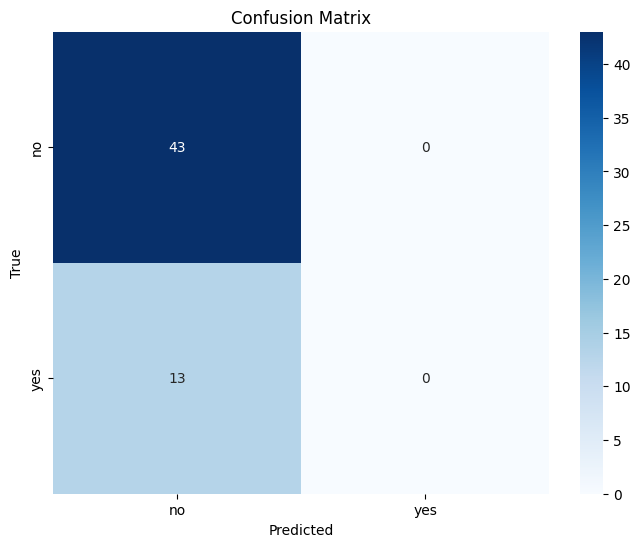

In [71]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




In [46]:
model_json = model.to_json()
with open("relevant_model_architecture.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('relevant_model_weights.h5')

Using

In [15]:
X_test=['อย่า ลืม ติดตาม ชม รายการ พิเศษ','ด่วน ลด แบบ จัดเต็ม ของแถม มากมาย']
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


array([[0.00938129, 0.0098284 , 0.98079026],
       [0.00386185, 0.00474969, 0.9913885 ]], dtype=float32)

End.................................................

In [39]:
Y # public work (โยธา), municipal office (เทศกิจ) ,police department

array([[ True, False, False],
       [False, False,  True],
       [ True, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [42]:
df_a.cleaned.values[1]

'เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อากาศ กทม เดิน หนัก มอ ไซ ขับ ฟุต บาต เเล้ว เ เร ง เหมือน เกะกะ ทางเดิน อันนี้ แก้'

In [33]:
X.shape #after padding sentence, input

(553, 63)

In [32]:
X #after padding

array([[   0,    0,    0, ...,  248,   84,  163],
       [   0,    0,    0, ...,    2,  472,  414],
       [   0,    0,    0, ...,  416, 1681,  828],
       ...,
       [   0,    0,    0, ...,  251,  105,  501],
       [   0,    0,    0, ...,   29, 1470, 1646],
       [   0,    0,    0, ...,  360,  183,  891]])

In [29]:
X[76] #before padding

[912,
 558,
 14,
 14,
 1219,
 706,
 31,
 110,
 1888,
 4,
 1220,
 913,
 158,
 1889,
 236,
 1221,
 88,
 1222,
 1,
 565,
 374,
 914,
 115]

In [30]:
tokenizer.word_index

{'เดิน': 1,
 'ทางเดิน': 2,
 'ฟุตบาท': 3,
 'ทางเท้า': 4,
 'ถนน': 5,
 'คน': 6,
 '2': 7,
 'แถว': 8,
 'เขต': 9,
 'ทำ': 10,
 'รถ': 11,
 'บริเวณ': 12,
 'น้ำท่วม': 13,
 'ซอย': 14,
 'ติด': 15,
 '1': 16,
 'น้ำ': 17,
 'แยก': 18,
 'ดี': 19,
 'กุ': 20,
 'เจอ': 21,
 '3': 22,
 '\u200b': 23,
 'ริม': 24,
 'สาย': 25,
 'ร้าน': 26,
 'ปัญหา': 27,
 'คลอง': 28,
 'สถานี': 29,
 'ดู': 30,
 'หน้า': 31,
 'โซน': 32,
 'พระ': 33,
 'จอด': 34,
 'บ้าน': 35,
 'เรื่อง': 36,
 'สุขุมวิท': 37,
 'อะ': 38,
 'อโศก': 39,
 'ม': 40,
 '4': 41,
 'กทม': 42,
 'พื้นที่': 43,
 'ทอง': 44,
 'ขาย': 45,
 'ลาดพร้าว': 46,
 '…': 47,
 'ส': 48,
 'จุด': 49,
 'สวน': 50,
 'เหมือน': 51,
 'นั่ง': 52,
 'ท่วม': 53,
 'ชุด': 54,
 'ประตู': 55,
 'สีลม': 56,
 'ฝนตก': 57,
 'น': 58,
 'ใบ': 59,
 'โรงพยาบาล': 60,
 'ฝน': 61,
 'ตอน': 62,
 'อากาศ': 63,
 'งาน': 64,
 'เส้น': 65,
 'รู้': 66,
 'บางนา': 67,
 '5': 68,
 'หัวใจ': 69,
 'บัตร': 70,
 'ชั้น': 71,
 'ยืน': 72,
 '2566': 73,
 'รถไฟฟ้า': 74,
 'ชอบ': 75,
 'สังคม': 76,
 'เมือง': 77,
 'ความดี': 78,
 'หลัก': 79,
 'ต

In [101]:
df_a.to_csv('./compare1.csv', index=False) # , header=False)

In [25]:
df_a

,index,username,tweet_id,tweet_text,org,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,split_text,combined,cleaned,split_cleaned,word_length
0,40,dohyunjinmin,1723873392980578712,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",31
1,48,Simmons37496127,1723769675656679557,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",27
2,56,xbiiryxxn,1723707515551314342,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",19
3,62,BAROCTARISREAL,1723676568256680410,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",36
4,68,ssssxsaii,1723591895224656205,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1003,noknok169,1701508987211116570,มีคนบอกว่าส่วนที่เป็นสีเหลืองมีลักษณะขรุขระแบบ...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ราช...",2023-09-12 8:12:09,2023-11-16 16:06:14,https://twitter.com/noknok169/status/170150898...,รามคำแหง,NaN,[],"[มี, คน, บอ, กว่า, ส่วน, ที่, เป็น, สีเหลือง, ...",มี คน บอ กว่า ส่วน ที่ เป็น สีเหลือง มี ลักษณะ...,คน บอ สีเหลือง ลักษณะ ขรุขระ แบบนี้ ทางเดิน ฟุ...,"[คน, บอ, สีเหลือง, ลักษณะ, ขรุขระ, แบบนี้, ทาง...",24
97,1005,Poor__cherry,1701501439196184947,ห้วยขวางบ่อย ทั้งจีนทั้งไทยขับรถตัวเฮียเกินขึ้...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-09-12 7:42:10,2023-11-16 15:20:42,https://twitter.com/Poor__cherry/status/170150...,ห้วยขวาง,NaN,[],"[ห้วยขวาง, บ่อย, ทั้ง, จีน, ทั้ง, ไทย, ขับรถ, ...",ห้วยขวาง บ่อย ทั้ง จีน ทั้ง ไทย ขับรถ ตัว เฮีย...,ห้วยขวาง จีน ไทย ขับรถ ตัว เฮีย จอด ฟุตบาท,"[ห้วยขวาง, จีน, ไทย, ขับรถ, ตัว, เฮีย, จอด, ฟุ...",8
98,1008,UncleHamzter,1701441389853307124,รีวิว แจ้งวิ่งบนฟุตบาท แจ้งไปกว่า 50 เคส เพิ่ง...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-09-12 3:43:33,2023-11-16 15:25:10,https://twitter.com/UncleHamzter/status/170144...,คล